# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [51]:
# Importação dos dados
"""
Este código acessa um arquivo CSV de feedbacks do Google Drive através do link do download desse arquivo e carrega os dados em um DataFrame pandas.
OBS: Caso precise realizar o download do arquivo, basta copiar e colar o link abaixo em uma aba do navegador"""

import pandas as pd

url = f'https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
dados_df = pd.read_csv(url, sep = ';')
dados_df

,nota,comentario
0,10,"Excelente Bootcamp, estou muito satisfeita!"
1,9,"Bootcamp top, mas mentorias de IA o tornariam ..."
2,6,"Um Bootcamp razoável, torcendo para o próximo ..."
3,10,"Bootcamp incrível, continuem potencializando a..."
4,7,"O Bootcamp foi ok, nada de especial."
5,9,Show de bola!
6,10,Melhor Bootcamp de todos!
7,0,Horrível!


In [52]:
# Paradigma imperativo.

notas = dados_df['nota']
detratores, promotores = 0,0

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100
print(f'{nps}%')

37.5%


In [53]:
# Paradigma Funcional.

def calcular_nps(notas):
  # Por ser uma list do Python, aplicamos o conceito de "list comprehension" para filtrar nossos Feedbacks.
  detratores = sum([1 for nota in notas if nota <= 6])
  # Conceito de indexação booleana
  promotores = notas[notas >= 9].count()

  return (promotores - detratores) / len(notas) * 100


notas = dados_df['nota']
print(f'{calcular_nps(notas)}%')

37.5%


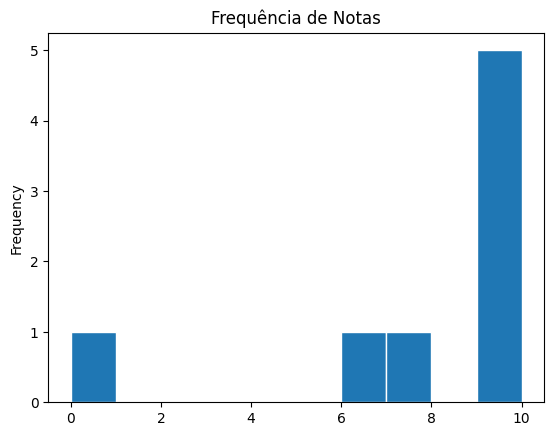

In [54]:
dados_df['nota'].plot(kind = 'hist', title = 'Frequência de Notas', edgecolor = 'white');

In [55]:
# Paradigma de orientação a objetos.

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario


class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks


  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(self.feedbacks) * 100


feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados_df.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(f'{nps}%')

37.5%


## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

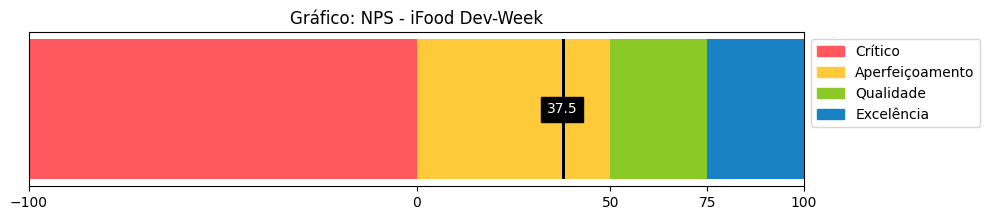

In [56]:
"""
Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1!
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Constantes que serão usadas para visualizar o NPS
NPS_ZONAS = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize =(10,2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width = NPS_VALORES[i+1] - NPS_VALORES[i], left = NPS_VALORES[i] , color = NPS_CORES[i]);

  ax.barh([0], width = 0.7, left = nps, color = 'black')

  ax.set_yticks([])  # Retirando os valores do eixo y;
  ax.set_xlim(-100, 100)   # Configurando os limites do eixo x;
  ax.set_xticks(NPS_VALORES) # Configurando para aparecer somentes os valores que são realmente utilizados;

  ax.text(nps, 0, f'{nps:.1f}', ha = 'center', va = 'center', color = 'white', bbox = dict(facecolor = 'black'))

  patches = [mpatches.Patch(color = NPS_CORES[i], label = NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles = patches, bbox_to_anchor = (1,1))

  plt.title('Gráfico: NPS - iFood Dev-Week')
  plt.show();

criar_grafico_nps(nps)

## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [61]:
!pip install openai

In [58]:
# Integração com o chat-gpt
# Vamos precisar gerar uma API Key nessa parte do projeto e para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Substitua o texto TODO por sua API Key da OpenAI, ela será salva como uma variável de ambiente.
openai_api_key = 'TODO'

In [60]:
import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):
  comentarios_formatados = "\n".join([f" - {feedback.comentario}" for feedback in feedbacks])
  prompt = f'Análise os seguintes comentários e classifique-os apenas em: positivo, neutro ou negativo: {comentarios_formatados}. Logo após, sintetize uma análise geral sobre o resultado.'

  resposta_API = openai.ChatCompletion.create(
      model = "gpt-4",
      messages = [
          {
              "role": "system",
              "content": "Você é um modelo de análise de sentimentos, com foco em feedbacks sobre experiências educacionais."
          },
          {
              "role": "user",
              "content": prompt
          }
      ]
  )

  return resposta_API.choices[0].message.content


insights = analisar_sentimentos(feedbacks)
print(insights)